In [66]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import random as rd

import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv("output/caratPrice.csv")
df.head()

,carat,price
0,0.20,365.166667
1,0.21,380.222222
2,0.22,391.400000
3,0.23,486.143345
4,0.24,505.185039


### Model 1 - Linear regression

In [49]:
model_lr = CmdStanModel(stan_file='model_lr.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Jakub Burczyk\Documents\PycharmProjects\DA_DiamondModel\model_lr.stan to exe file C:\Users\Jakub Burczyk\Documents\PycharmProjects\DA_DiamondModel\model_lr.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Jakub Burczyk\Documents\PycharmProjects\DA_DiamondModel\model_lr.exe


In [50]:
result_lr = model_lr.sample(data=dict(N=len(df), x=df.carat.values, y=df.price.values))
print(result_lr.draws_pd())

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.



         lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  \
0    -2681.16       1.000000    0.710250          3.0           7.0   
1    -2683.43       0.831682    0.710250          2.0           7.0   
2    -2682.46       0.902079    0.710250          2.0           3.0   
3    -2683.05       0.985191    0.710250          3.0           7.0   
4    -2680.17       1.000000    0.710250          3.0           7.0   
...       ...            ...         ...          ...           ...   
3995 -2681.11       0.712402    0.828801          2.0           3.0   
3996 -2681.73       0.933200    0.828801          2.0           7.0   
3997 -2680.31       1.000000    0.828801          2.0           3.0   
3998 -2681.25       0.679997    0.828801          3.0           7.0   
3999 -2683.72       0.781985    0.828801          2.0           3.0   

      divergent__  energy__    alpha     beta    sigma  ...  log_lik[264]  \
0             0.0   2682.74  208.315  5652.07  1379.28  ...      -11.

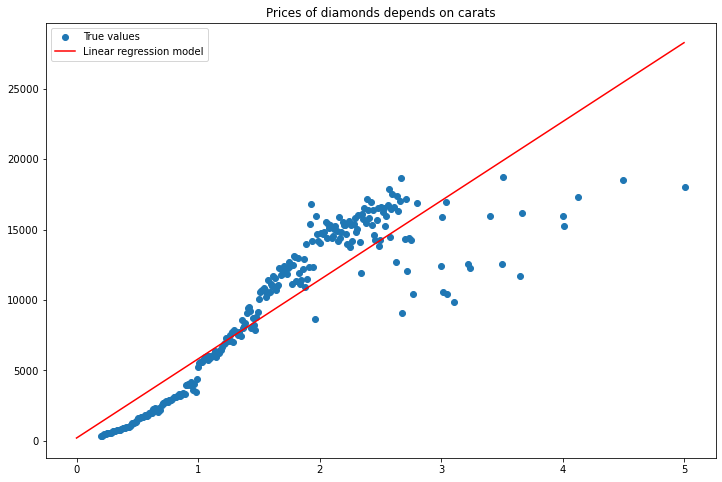

In [51]:
df_alpha = pd.DataFrame(result_lr.stan_variables()["alpha"])
df_beta = pd.DataFrame(result_lr.stan_variables()["beta"])
df_sigma = pd.DataFrame(result_lr.stan_variables()["sigma"])

alpha = df_alpha.mean().to_numpy()
beta = df_beta.mean().to_numpy()
sigma= df_sigma.mean().to_numpy()

x = np.linspace(0, 5, 100)
y = alpha + beta*x

plt.figure(figsize=[12, 8])
plt.scatter(df.carat.values, df.price.values)
plt.plot(x, y, "-r")
plt.title("Prices of diamonds depends on carats")
plt.legend(["True values", "Linear regression model"])
plt.show()

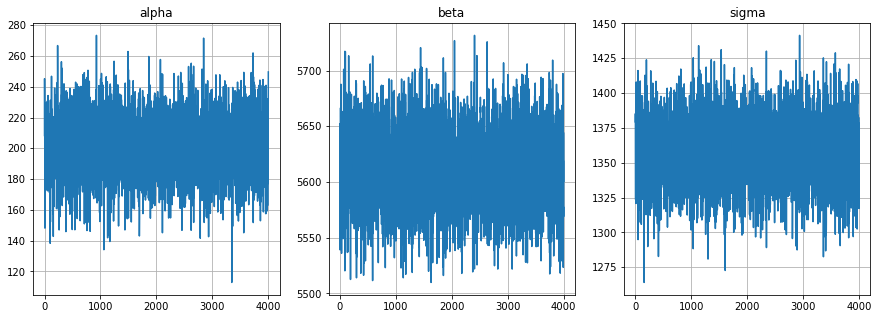

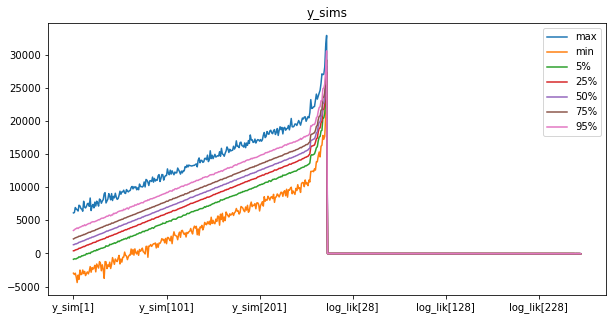

In [52]:
fig, axs = plt.subplots(1,3)
fig.set_size_inches(15, 5)
axs[0].plot(df_alpha)
axs[0].grid()
axs[0].set_title('alpha')
axs[1].plot(df_beta)
axs[1].grid()
axs[1].set_title('beta')
axs[2].plot(df_sigma)
axs[2].grid()
axs[2].set_title('sigma')
plt.show()

data = result_lr.draws_pd()
y_sims = data[data.columns[10:]]

quans = pd.DataFrame({'max': y_sims.max(), 'min': y_sims.min(), '5%': y_sims.quantile(0.05), '25%': y_sims.quantile(0.25), '50%': y_sims.quantile(0.5), '75%': y_sims.quantile(0.75), '95%': y_sims.quantile(0.95)})
quans.plot(figsize=(10,5))
plt.title("y_sims")
plt.show()

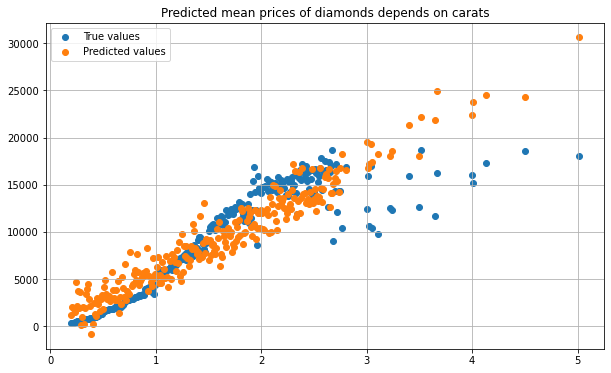

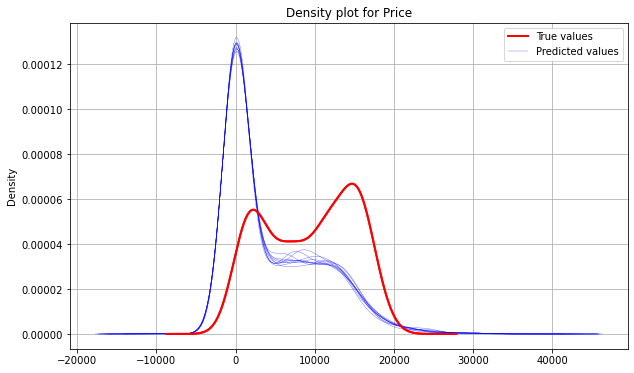

In [53]:
y_sim = result_lr.stan_variable('y_sim')
plt.figure(figsize=[10,6])
plt.scatter(df.carat.values, df.price.values)
plt.scatter(df.carat.values, y_sim[1])
plt.title("Predicted mean prices of diamonds depends on carats")
plt.legend(["True values", "Predicted values"])
plt.grid()
plt.show()


df.price.plot.density(figsize=(10,6), linewidth=2, color='red')
for i in range(0,10):
    y_sims.iloc[i].plot.density(linewidth=0.25, color='blue')
df.price.plot.density(figsize=(10,6), linewidth=2, color='red')
plt.title('Density plot for Price')
plt.legend(["True values", "Predicted values"])
plt.grid()
plt.show()

### Model 2 - Polynomial regression

In [54]:
model_pr = CmdStanModel(stan_file='model_pr.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Jakub Burczyk\Documents\PycharmProjects\DA_DiamondModel\model_pr.stan to exe file C:\Users\Jakub Burczyk\Documents\PycharmProjects\DA_DiamondModel\model_pr.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Jakub Burczyk\Documents\PycharmProjects\DA_DiamondModel\model_pr.exe


In [55]:
result_pr = model_pr.sample(data=dict(N=len(df), x=df.carat.values, y=df.price.values))
print(result_pr.draws_pd())

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status
chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▊        | 00:01 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▎       | 00:02 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |██▋       | 00:04 Iteration:  400 / 2000 [ 20%]  (Warmup)




chain 1 |███▏      | 00:06 Iteration:  500 / 2000 [ 25%]  (Warmup)




chain 1 |███▋      | 00:06 Iteration:  600 / 2000 [ 30%]  (Warmup)




chain 1 |████      | 00:07 Iteration:  700 / 2000 [ 35%]  (Warmup)





chain 1 |████▌     | 00:08 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |█████     | 00:08 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |█████▉    | 00:08 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:09 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:09 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:10 Iteration: 1300 /


INFO:cmdstanpy:CmdStan done processing.



         lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  \
0    -3114.37       0.958502    0.057488          6.0          63.0   
1    -3112.95       0.975173    0.057488          5.0          31.0   
2    -3115.03       0.991666    0.057488          5.0          47.0   
3    -3113.20       0.992040    0.057488          5.0          31.0   
4    -3113.72       0.997568    0.057488          4.0          31.0   
...       ...            ...         ...          ...           ...   
3995 -3115.04       0.934733    0.066657          6.0          63.0   
3996 -3118.23       0.976758    0.066657          6.0          63.0   
3997 -3118.09       0.998329    0.066657          4.0          23.0   
3998 -3114.51       0.999667    0.066657          6.0          63.0   
3999 -3113.18       0.981252    0.066657          6.0          63.0   

      divergent__  energy__    alpha   beta_1   beta_2  ...  log_lik[264]  \
0             0.0   3115.31  624.035 -4103.42  12962.0  ...     -10.7

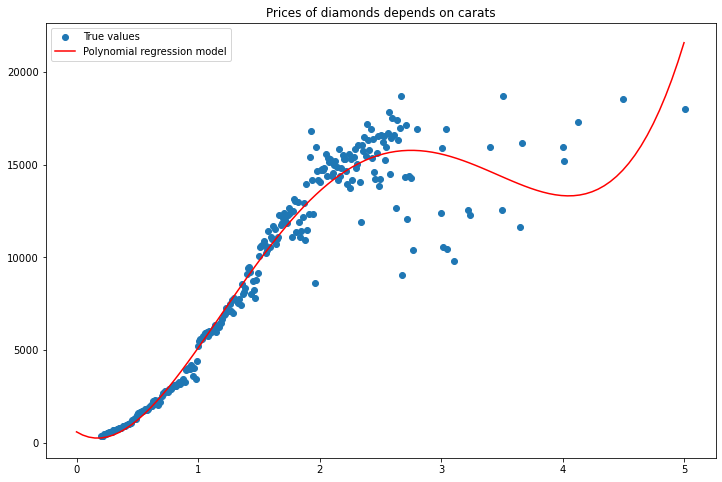

In [56]:
df_alpha = pd.DataFrame(result_pr.stan_variables()["alpha"])
df_beta_1 = pd.DataFrame(result_pr.stan_variables()["beta_1"])
df_beta_2 = pd.DataFrame(result_pr.stan_variables()["beta_2"])
df_beta_3 = pd.DataFrame(result_pr.stan_variables()["beta_3"])
df_beta_4 = pd.DataFrame(result_pr.stan_variables()["beta_4"])
df_sigma = pd.DataFrame(result_pr.stan_variables()["sigma"])

alpha = df_alpha.mean().to_numpy()
beta_1 = df_beta_1.mean().to_numpy()
beta_2 = df_beta_2.mean().to_numpy()
beta_3 = df_beta_3.mean().to_numpy()
beta_4 = df_beta_4.mean().to_numpy()

sigma= df_sigma.mean().to_numpy()

x = np.linspace(0, 5, 100)
y = alpha + beta_1*x + beta_2*(x**2) + beta_3*(x**3) + beta_4*(x**4)

plt.figure(figsize=[12, 8])
plt.scatter(df.carat.values, df.price.values)
plt.plot(x, y, "-r")
plt.title("Prices of diamonds depends on carats")
plt.legend(["True values", "Polynomial regression model"])
plt.show()

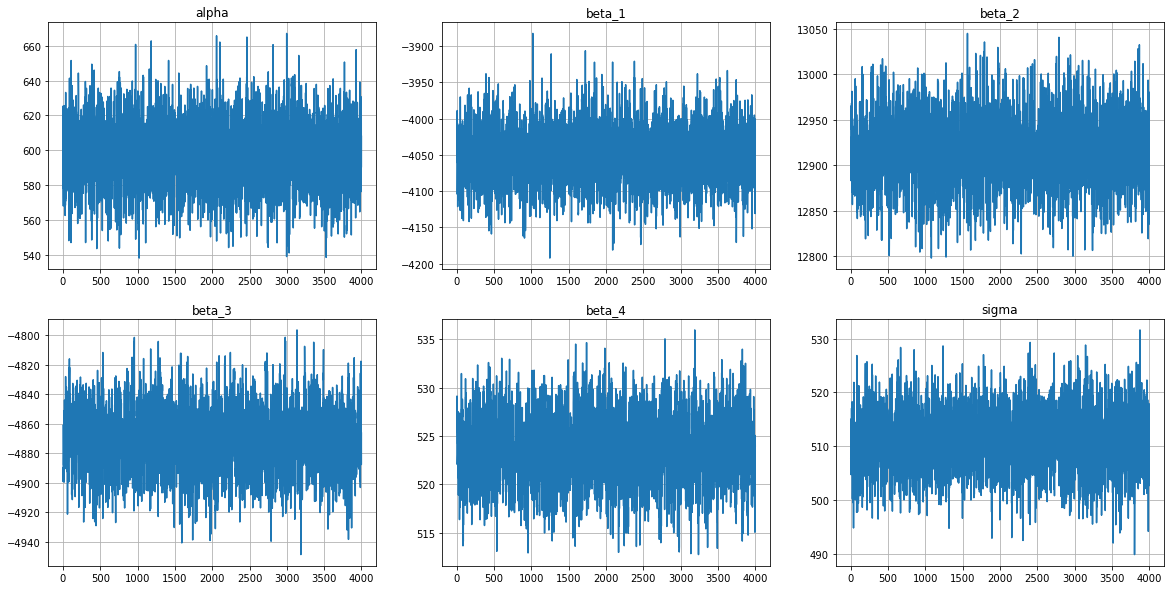

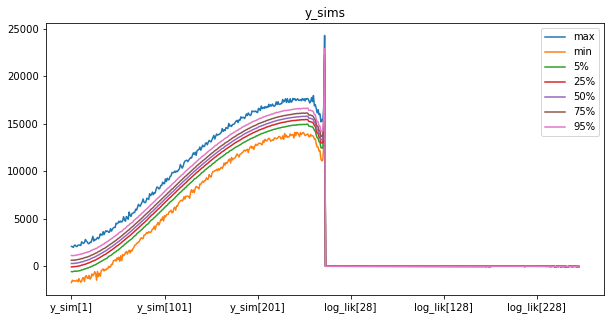

In [57]:
fig, axs = plt.subplots(2,3)
fig.set_size_inches(20, 10)
axs[0][0].plot(df_alpha)
axs[0][0].grid()
axs[0][0].set_title('alpha')
axs[0][1].plot(df_beta_1)
axs[0][1].grid()
axs[0][1].set_title('beta_1')
axs[0][2].plot(df_beta_2)
axs[0][2].grid()
axs[0][2].set_title('beta_2')
axs[1][0].plot(df_beta_3)
axs[1][0].grid()
axs[1][0].set_title('beta_3')
axs[1][1].plot(df_beta_4)
axs[1][1].grid()
axs[1][1].set_title('beta_4')
axs[1][2].plot(df_sigma)
axs[1][2].grid()
axs[1][2].set_title('sigma')
plt.show()

data = result_pr.draws_pd()
y_sims = data[data.columns[13:]]

quans = pd.DataFrame({'max': y_sims.max(), 'min': y_sims.min(), '5%': y_sims.quantile(0.05), '25%': y_sims.quantile(0.25), '50%': y_sims.quantile(0.5), '75%': y_sims.quantile(0.75), '95%': y_sims.quantile(0.95)})
quans.plot(figsize=(10,5))
plt.title("y_sims")
plt.show()

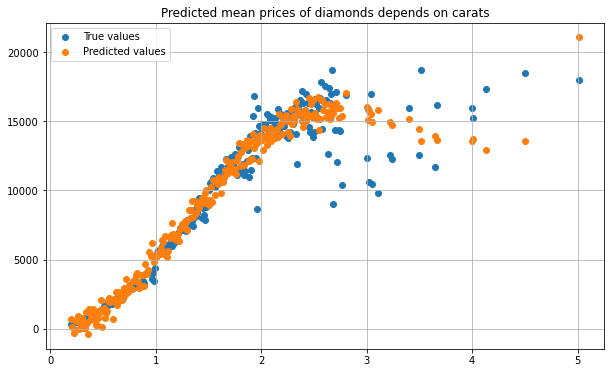

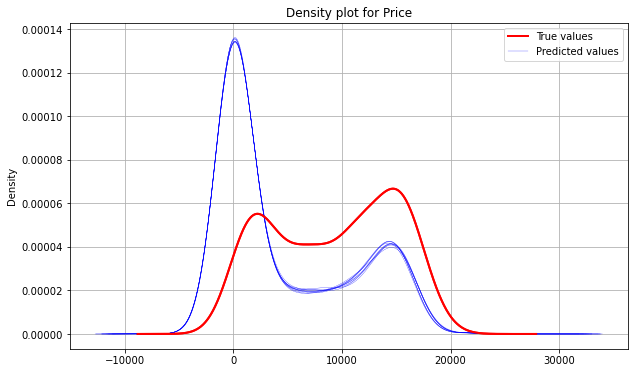

In [58]:
y_sim = result_pr.stan_variable('y_sim')

plt.figure(figsize=[10,6])
plt.scatter(df.carat.values, df.price.values)
plt.scatter(df.carat.values, y_sim[1])
plt.title("Predicted mean prices of diamonds depends on carats")
plt.legend(["True values", "Predicted values"])
plt.grid()
plt.show()


df.price.plot.density(figsize=(10,6), linewidth=2, color='red')
for i in range(0,10):
    y_sims.iloc[i].plot.density(linewidth=0.25, color='blue')
df.price.plot.density(figsize=(10,6), linewidth=2, color='red')
plt.title('Density plot for Price')
plt.legend(["True values", "Predicted values"])
plt.grid()
plt.show()

### Model 3 - Gaussian process

In [59]:
model_gp_opt = CmdStanModel(stan_file='model_gp_opt.stan')
data = dict(N = len(df), x = df.carat.values, y = df.price.values)
result_gp_opt = model_gp_opt.optimize(data=data, algorithm='Newton')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


In [75]:
model_gp = CmdStanModel(stan_file='model_gp.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Jakub Burczyk\Documents\PycharmProjects\DA_DiamondModel\model_gp.stan to exe file C:\Users\Jakub Burczyk\Documents\PycharmProjects\DA_DiamondModel\model_gp.exe
ERROR:cmdstanpy:Stan program failed to compile:
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/JAKUBB~1/DOCUME~1/PYCHAR~1/DA_DIA~1/model_gp.hpp C:/Users/JAKUBB~1/DOCUME~1/PYCHAR~1/DA_DIA~1/model_gp.stan
Warning in 'C:/Users/JAKUBB~1/DOCUME~1/PYCHAR~1/DA_DIA~1/model_gp.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/JAKUBB~1/DOCUME~1/PYCHAR~1/DA_DIA~1/model_gp.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the ar

ValueError: Unable to compile Stan model file: C:\Users\Jakub Burczyk\Documents\PycharmProjects\DA_DiamondModel\model_gp.stan.

In [70]:
"""
result = result_gp_opt.optimized_params_pd

alpha = float(result['alpha'])
rho = float(result['rho'])
sigma = float(result['sigma'])

print(alpha)
print(rho)
print(sigma)
"""
alpha = 130
rho = 1
sigma = 100


In [71]:
idx = range(1, len(df.price.values)+1)
data = dict(N = len(df), x = df.carat.values, y = df.price.values, idx = idx, rho=rho, alpha=alpha, sigma=sigma)
result_gp = model_gp.sample(data=data)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:01 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:02 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:02 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:03 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:03 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:03 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:04 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:05 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:05 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:06 Iteration: 1200 / 2000 [ 60%

INFO:cmdstanpy:CmdStan done processing.


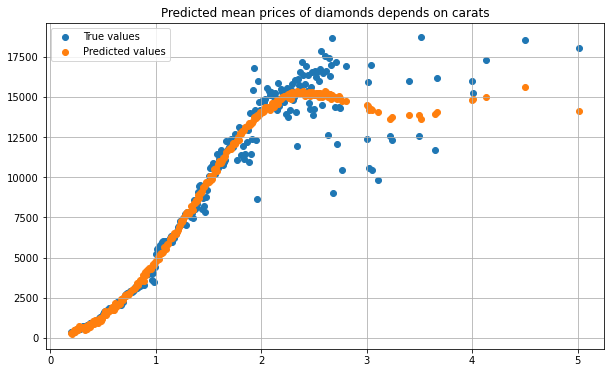

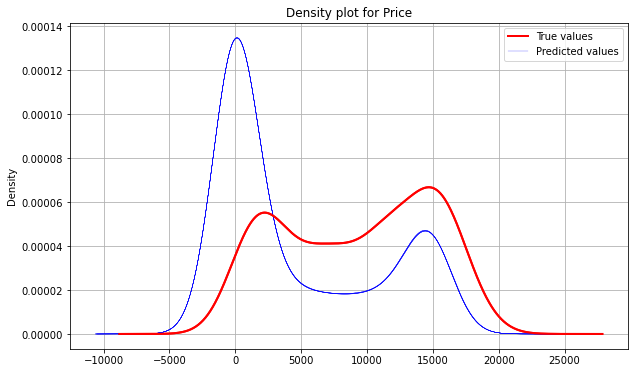

In [72]:
data = result_gp.draws_pd()
y_sims = data[data.columns[553:]]
y_sim = result_gp.stan_variable('y_sim')

plt.figure(figsize=[10,6])
plt.scatter(df.carat.values, df.price.values)
plt.scatter(df.carat.values, y_sim[0])
plt.title("Predicted mean prices of diamonds depends on carats")
plt.legend(["True values", "Predicted values"])
plt.grid()
plt.show()

df.price.plot.density(figsize=(10,6), linewidth=2, color='red')
for i in range(0,10):
    y_sims.iloc[i].plot.density(linewidth=0.25, color='blue')
df.price.plot.density(figsize=(10,6), linewidth=2, color='red')
plt.title('Density plot for Price')
plt.legend(["True values", "Predicted values"])
plt.grid()
plt.show()

### Comparison of models



           rank           loo        p_loo         d_loo    weight  \
model_lr_     0  -2675.244976     8.850748      0.000000  0.234203   
model_pr_     1  -2928.176295    80.855237    252.931319  0.543948   
model_gp_     2 -21687.055269  1032.698594  19011.810293  0.221849   

                    se          dse  warning loo_scale  
model_lr_    55.486670     0.000000    False       log  
model_pr_   169.125273   138.982726     True       log  
model_gp_  3367.240473  3339.967275     True       log  


<AxesSubplot:xlabel='Log'>

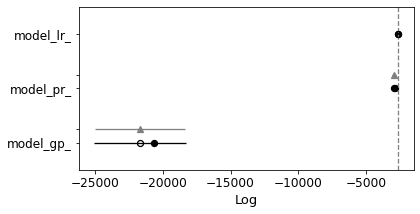

In [73]:
data = dict(model_lr_ = result_lr, model_pr_ = result_pr, model_gp_ = result_gp)
comp_loo = az.compare(data, ic = "loo")
print('\n')
print(comp_loo)
az.plot_compare(comp_loo)



           rank          waic       p_waic        d_waic    weight  \
model_lr_     0  -2675.239066     8.844838      0.000000  0.234226   
model_pr_     1  -2938.683522    91.362465    263.444457  0.543916   
model_gp_     2 -22503.695456  1849.338781  19828.456390  0.221858   

                    se          dse  warning waic_scale  
model_lr_    55.487011     0.000000     True        log  
model_pr_   171.843666   140.395271     True        log  
model_gp_  3567.584747  3537.551046     True        log  


<AxesSubplot:xlabel='Log'>

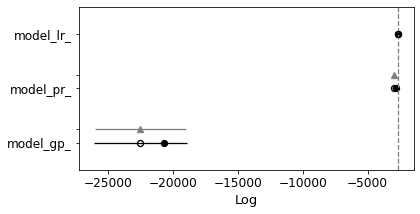

In [74]:
comp_waic = az.compare(data, ic = "waic")
print('\n')
print(comp_waic)
az.plot_compare(comp_waic)